In [1]:
import sys
import numpy as np
RNG = 10
np.random.seed(RNG)
import pandas as pd

from sklearn.utils import resample
from sklearn.datasets import make_classification, make_moons
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from unbalanced_dataset import UnderSampler, OverSampler


import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
COLORS10 = [
'#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf',
]

In [16]:
# Create synthetic data
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.5],
    n_informative=2, n_redundant=0, flip_y=0.1,
    n_features=2, n_clusters_per_class=1, hypercube=True,
    n_samples=1000, random_state=RNG)

# X, y = make_moons(n_samples=150, noise=0.2, random_state=0)
print X.shape, y.shape

(1000, 2) (1000,)


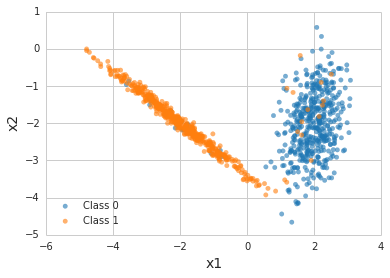

In [18]:
fig, ax = plt.subplots()
mask = y==0
ax.scatter(X[mask, 0], X[mask, 1], color=COLORS10[0], label='Class 0', alpha=0.6)
ax.scatter(X[~mask, 0], X[~mask, 1], color=COLORS10[1], label='Class 1', alpha=0.6)
ax.legend(loc='lower left')
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
plt.show()

In [19]:
def plot_classification_boundary(clf, X_train, y_train, X_valid, y_valid):
    # Plotting decision regions for clf 
    clf.fit(X_train, y_train)
#     fig, axes = plt.subplots(1,2)
    fig = plt.figure(figsize=(4, 6))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)

    X = np.vstack((X_train, X_valid))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax1.contourf(xx, yy, Z, alpha=0.4)
    ax2.contourf(xx, yy, Z, alpha=0.4)
    mask = y_train==0
    ax1.scatter(X_train[mask, 0], X_train[mask, 1], c=COLORS10[0], alpha=0.6)
    ax1.scatter(X_train[~mask, 0], X_train[~mask, 1], c=COLORS10[1], alpha=0.6)
    ax1.set_ylabel('x2', fontsize=14)
    ax1.set_title('Training', fontsize=16)
    
    mask = y_valid==0
    ax2.scatter(X_valid[mask, 0], X_valid[mask, 1], c=COLORS10[0], alpha=0.6)
    ax2.scatter(X_valid[~mask, 0], X_valid[~mask, 1], c=COLORS10[1], alpha=0.6)

    ax2.set_xlabel('x1', fontsize=14)
    ax2.set_ylabel('x2', fontsize=14)    
    ax2.set_title('Validation', fontsize=16)

    fig.tight_layout()
    return fig


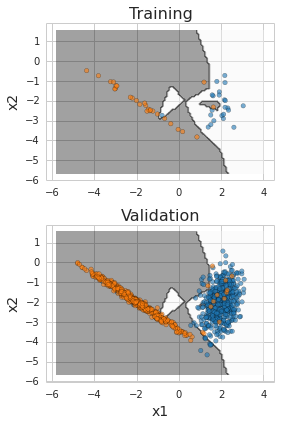

In [20]:
N_TRAIN = 50
clf1 = KNeighborsClassifier(n_neighbors=1)

fig = plot_classification_boundary(clf1, X[:N_TRAIN], y[:N_TRAIN], X[N_TRAIN:], y[N_TRAIN:])

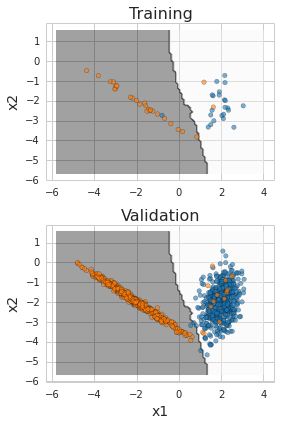

In [21]:
clf1 = KNeighborsClassifier(n_neighbors=5)

ax = plot_classification_boundary(clf1, X[:N_TRAIN], y[:N_TRAIN], X[N_TRAIN:], y[N_TRAIN:])

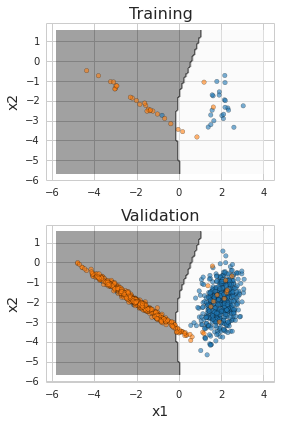

In [22]:
clf1 = KNeighborsClassifier(n_neighbors=round(N_TRAIN * 0.9))

ax = plot_classification_boundary(clf1, X[:N_TRAIN], y[:N_TRAIN], X[N_TRAIN:], y[N_TRAIN:])